In [2]:
from qaoa import *
from plotting_functions_QAOA import*
import networkx as nx
from qiskit import Aer

# Global Variables
NUM_SHOTS = 8192
weighted=False
backend = Aer.get_backend("qasm_simulator")


# Updating figure params
newparams = {'figure.figsize': (10, 7), 'axes.grid': False,
             'lines.markersize': 10, 'lines.linewidth': 2,
             'font.size': 15, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral', 'figure.dpi': 200}
plt.rcParams.update(newparams)


## Importing the regular graph

The graph can either be unweighted (all weights equal to one), or weighted (each weight is drawn from a uniform distribution in the interval [0,1]).

NB! ALL of the cells should be ran again on a slightly more beefy computer.


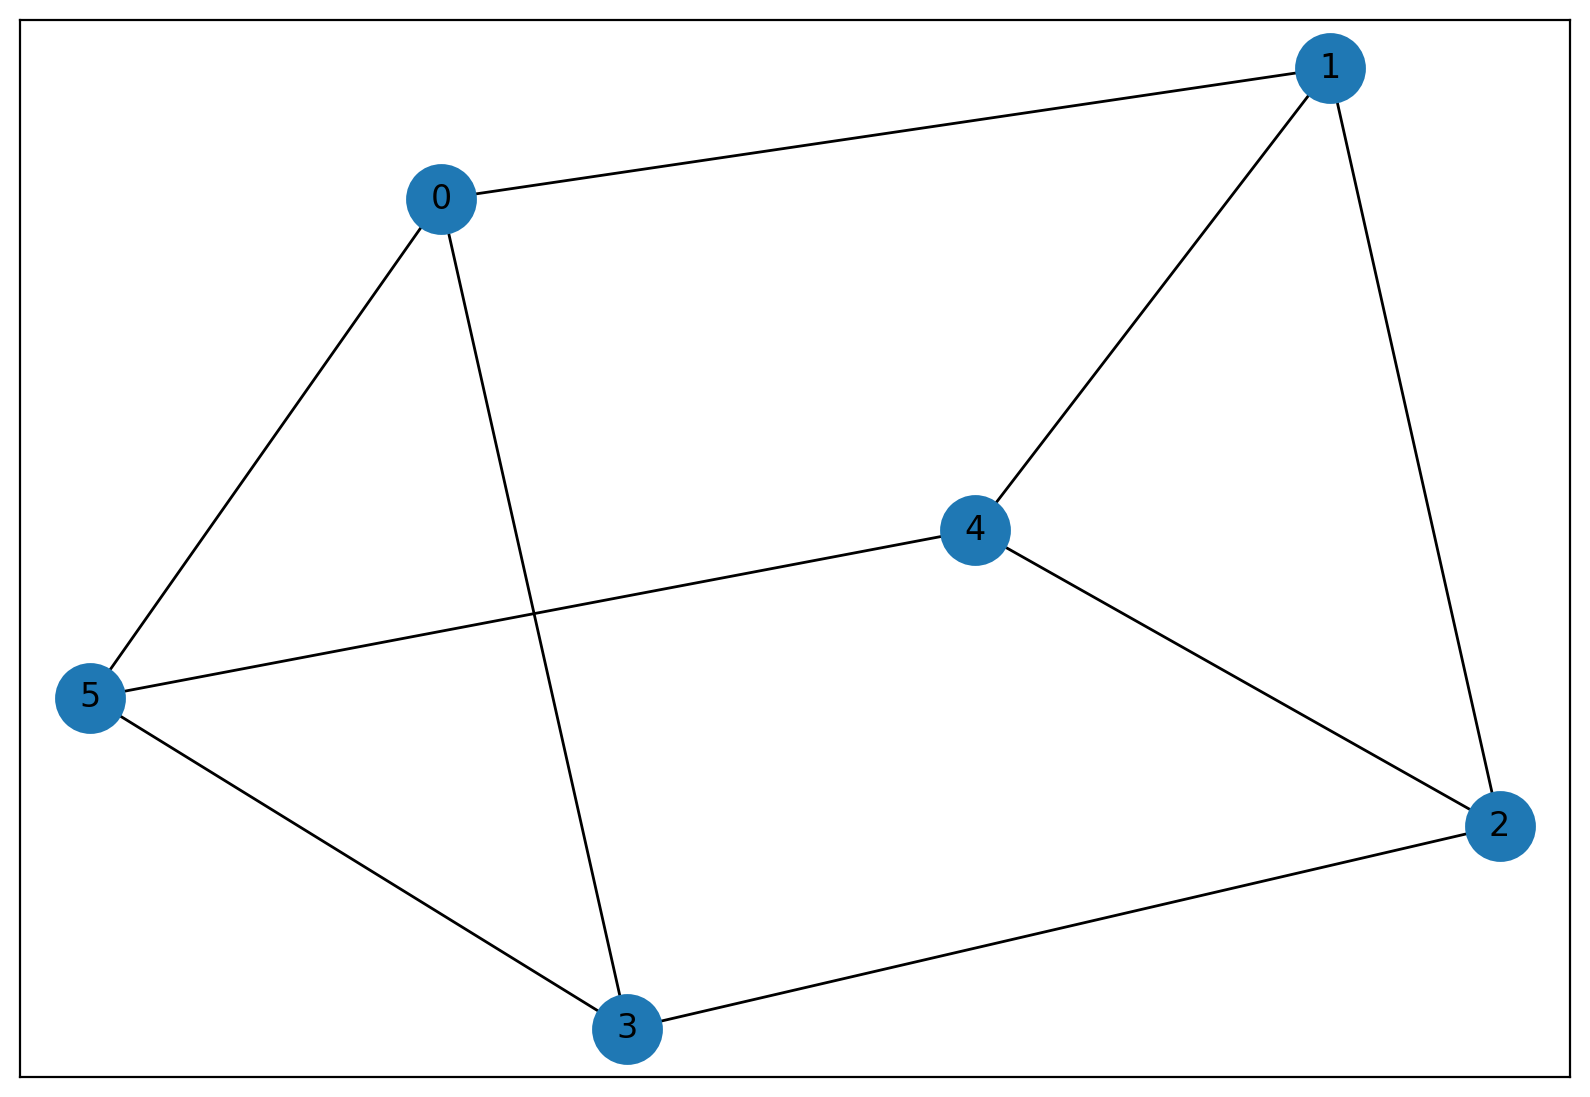

In [3]:
d = 3 # 3 regular graph
n = 6 # # nodes
G = nx.random_regular_graph(d,n) # d*n must be even

if weighted:
    for edge in G.edges():
        i=int(edge[0])
        j=int(edge[1])
        E = [(i,j,np.random.uniform())]
        G.add_weighted_edges_from(E)
else:
    for edge in G.edges():
        i=int(edge[0])
        j=int(edge[1])
        E = [(i,j,1.0)]
        G.add_weighted_edges_from(E)
nx.draw_networkx(G, node_size=600, alpha=1)


Let us first see how the error scales with increasing the number of layers $p$. $r$ is the approximation ratio defined as the ratio of the respective cost functions for the MaxCut configuration found by the QAOA, and the actual MaxCut configuration found by brute forcing the problem.

In this case we only use 3 random initializations for each $p$, and choose the best parameters. 

100%
The optimal cut is equal to:  7.0


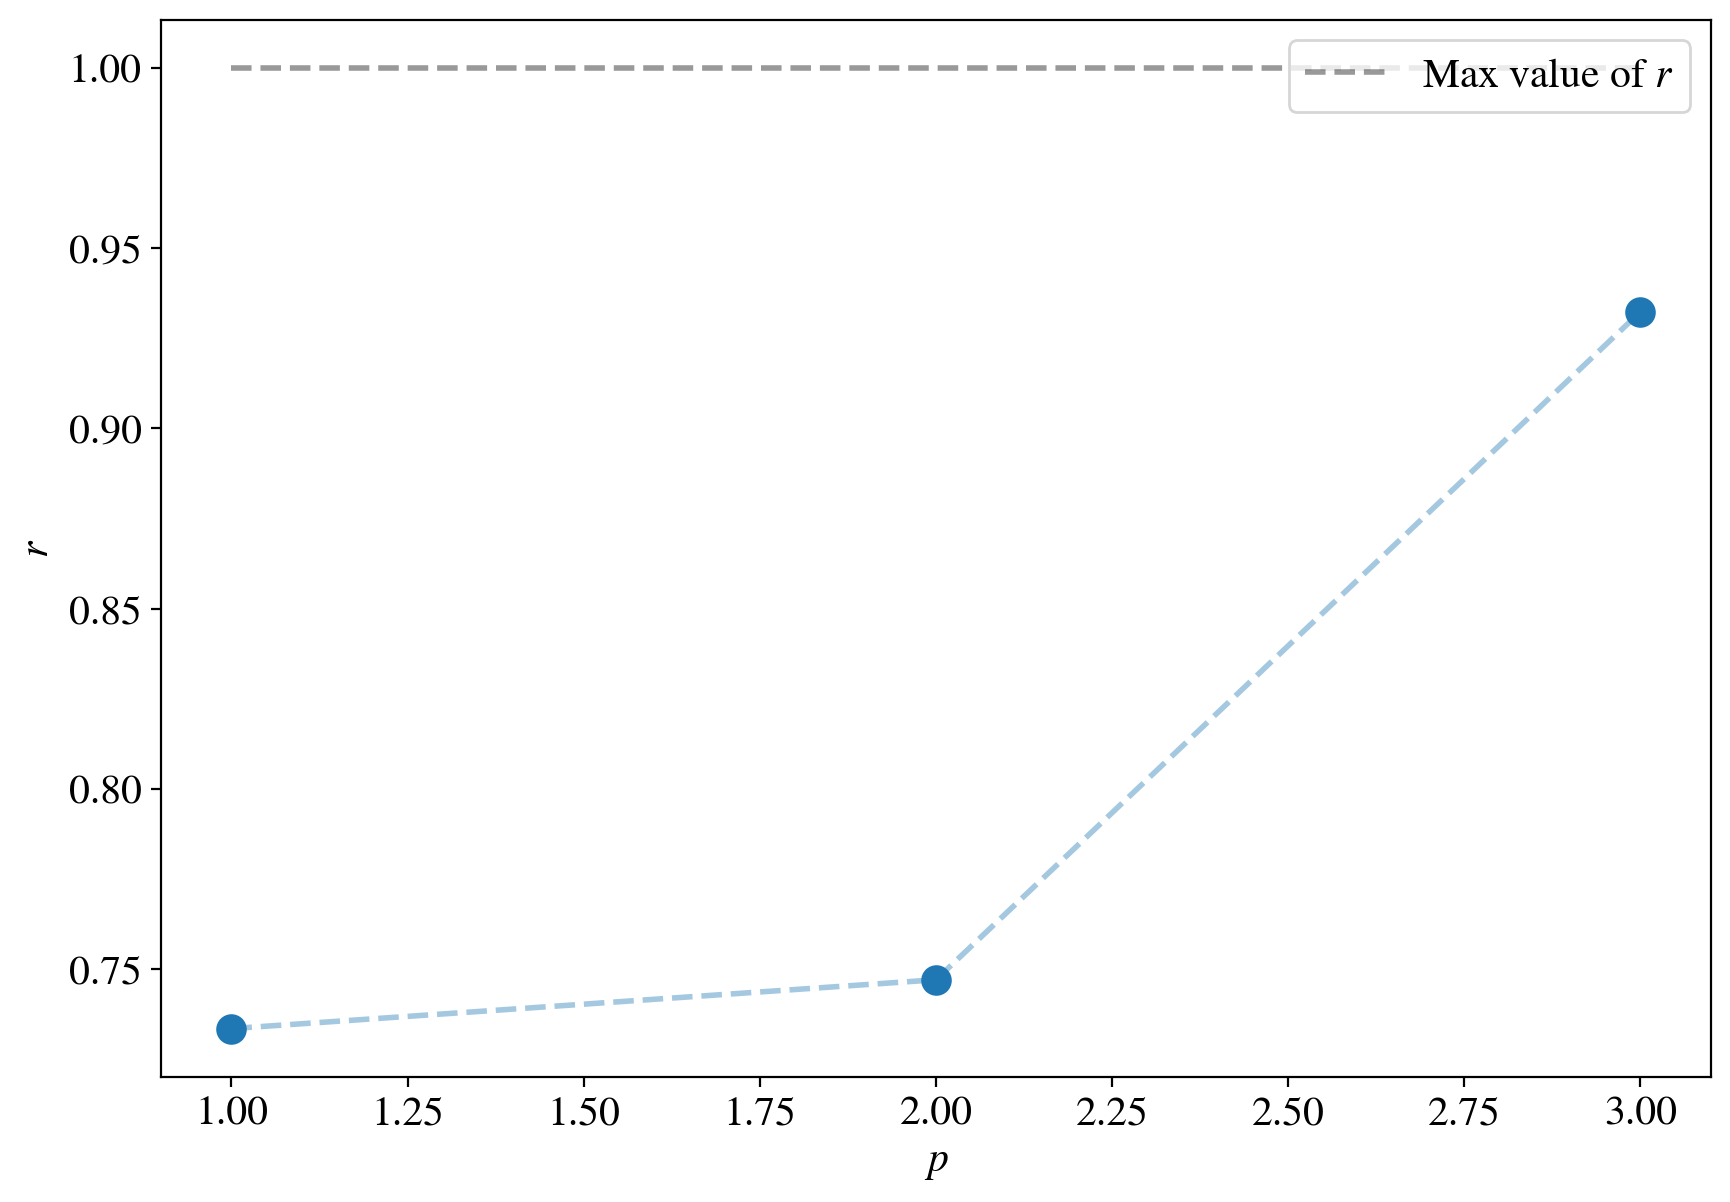

In [4]:
p_list, H_list, avg_list = scale_p(3, G, backend, depth=3, weighted=False)

costs = costsHist_MaxCut(G)
MAX_COST = max(costs)
print("The optimal cut is equal to: ", MAX_COST)
r_list = H_list / MAX_COST

plt.scatter(p_list, r_list)
plt.plot(p_list, r_list, linestyle="--", alpha=0.4)
plt.hlines(1, np.amin(p_list), np.amax(p_list), linestyles="--", alpha=0.4, label=r"Max value of $r$")
plt.ylabel(r"$r$")
plt.xlabel(r"$p$")
plt.legend()
plt.show()

The INTERP heuristic uses the optimal parameters at depth $p$ to find good initial guesses at depth $p + 1$. In order to compare the two strategies, we run the two algorithms $K$ times for each $p$, and plot the best approximation ratio, $r^{opt}$ found in each layer.


In [5]:
compare_methods(3, G, p_max=3, weighted=False)

TypeError: compare_methods() missing 1 required positional argument: 'backend'

Lastly, it is interesting to study how the optimal parameters change as we increase the level of depth. The main finding is that they are correlated, and this correlation is exactly what makes the INTERP heuristic work.

In this case we study $M$ different graphs(all of the same type), and use $K$ tries to find the best parameters for each graph.

In [ ]:
gamma_beta_func_of_p(6, M=3, K=10)